# 1. Compréhension du métier

La mobilité urbaine devient de plus en plus complexe, nécessitant des infrastructures intelligentes et une prise de décision basée sur les données.  
Ce projet vise à accompagner la transformation des villes traditionnelles en **villes intelligentes** en facilitant une gestion intelligente du trafic.

La congestion aux grands carrefours entraîne des retards, des inefficacités et une pression environnementale accrue.  
En prévoyant les volumes de trafic **horaire** à des points névralgiques sur une période de **quatre mois**, ce projet aidera les autorités locales à **planifier de manière proactive** et à **optimiser l’allocation des ressources**.

---

## Justification ODD (Objectifs de Développement Durable)

Ce projet est en cohérence avec les **Objectifs de Développement Durable (ODD)** définis par les Nations Unies :

### 🏙️ ODD 11 – Villes et communautés durables  
Amélioration de la mobilité urbaine et réduction de la congestion pour favoriser des villes plus sûres, inclusives et durables.

### 🏗️ ODD 9 – Industrie, innovation et infrastructure  
Utilisation de capteurs **IoT** et d’**analytique prédictive** pour encourager des infrastructures intelligentes et des opérations urbaines innovantes.

### 🌍 ODD 13 – Lutte contre les changements climatiques  
Réduction des émissions dues au trafic et de la consommation de carburant, contribuant aux efforts d’atténuation du changement climatique.

---

 En répondant à ces objectifs, ce projet ne se contente pas de produire des prévisions —  
il contribue à un **aménagement urbain durable et intelligent**.


# 🎯 Cercle d’Or – Vision du Projet

### 💡 POURQUOI ?  
Réduire la congestion routière et améliorer la mobilité urbaine en développant des infrastructures plus intelligentes et une prise de décision fondée sur les données.

### ⚙️ COMMENT ?  
En modélisant les flux historiques de véhicules par heure à chaque carrefour à l’aide de techniques de prévision temporelle, notamment **SARIMA** et des modèles apparentés.

### 📈 QUOI ?  
Un système prédictif capable d’estimer le volume de trafic par carrefour, permettant à la ville de **planifier de manière proactive** et d’**optimiser l’allocation des ressources**.


# 2. Compréhension des données

## Objectif global
Avant toute modélisation, il est essentiel de **comprendre en profondeur la structure, la qualité et le contenu des données**. Cela garantit que les étapes suivantes (préparation, modélisation, évaluation) reposent sur une base solide.

Le jeu de données contient des **observations horaires du trafic routier** enregistrées sur une période allant de **novembre 2015 à juin 2017**, pour **quatre carrefours urbains (Junctions 1 à 4)**.

---

## Détails des données
- **Nombre total de lignes :** 48 120  
- **Colonnes disponibles :**
  - `DateTime` : horodatage de chaque observation (au pas horaire)
  - `Junction` : identifiant du carrefour (1 à 4)
  - `Vehicles` : nombre de véhicules détectés à l'heure donnée
  - `ID` : identifiant unique de l’observation (non utilisé dans l’analyse)

---

## Objectifs spécifiques de cette phase

- **Parser et formater la variable `DateTime`** pour les futures manipulations temporelles (détection des tendances, saisonnalités, etc.)
- **Résumer chaque carrefour** : nombre d’enregistrements, dates de début/fin, distribution de trafic
- **Détecter les valeurs manquantes et aberrantes**, anomalies qui pourraient compromettre la modélisation
- **Évaluer la qualité et la complétude** de chaque série temporelle afin de choisir les candidats les plus fiables pour la suite
- **Visualiser le trafic horaire** sur la période pour détecter les pics, motifs récurrents ou perturbations

---

## Étapes réalisées

- **Chargement** des données via `read_csv()`  
- **Inspection** des variables avec `head()`, `summary()`, `str()`  
- **Vérification de la granularité temporelle**  
- **Analyse des valeurs uniques de `Junction`**  
- **Visualisation du trafic** (par carrefour et dans le temps)

---

## Pourquoi c'est important ?

Comprendre les données en amont permet de :
- **Déterminer la faisabilité de la prévision horaire**
- **Repérer les ruptures de série** ou incohérences
- **Adapter la stratégie de modélisation** (modèles univariés vs multivariés, besoin d’imputation, etc.)
- **Gagner du temps en évitant les erreurs d’interprétation ou de transformation ultérieure**

---

En résumé, cette étape constitue le **socle de toute la chaîne analytique**. Une bonne compréhension initiale permet une modélisation plus ciblée, efficace et robuste.


In [1]:
library(stringr)
library(tidyverse)


Warning message:
"package 'stringr' was built under R version 3.6.3"
Warning message:
"package 'tidyverse' was built under R version 3.6.3"
-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.2     v dplyr   1.0.6
v tidyr   1.1.3     v forcats 0.5.1
v readr   1.4.0     

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'tibble' was built under R version 3.6.3"
Warning message:
"package 'tidyr' was built under R version 3.6.3"
Warning message:
"package 'readr' was built under R version 3.6.3"
Warning message:
"package 'purrr' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Warning message:
"package 'forcats' was built under R version 3.6.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [6]:
list.files("C:/Users/menia/Desktop/dataset_ST")

[1] "sample_submission_ML_IOT.csv" "test_ML_IOT.csv"             
[3] "train_ML_IOT.csv"


-- Column specification --------------------------------------------------------
cols(
  DateTime = col_datetime(format = ""),
  Junction = col_double(),
  Vehicles = col_double(),
  ID = col_double()
)




DateTime,Junction,Vehicles,ID
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041
2015-11-01 05:00:00,1,6,20151101051


spec_tbl_df [48,120 x 4] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ DateTime: POSIXct[1:48120], format: "2015-11-01 00:00:00" "2015-11-01 01:00:00" ...
 $ Junction: num [1:48120] 1 1 1 1 1 1 1 1 1 1 ...
 $ Vehicles: num [1:48120] 15 13 10 7 9 6 9 8 11 12 ...
 $ ID      : num [1:48120] 2.02e+10 2.02e+10 2.02e+10 2.02e+10 2.02e+10 ...
 - attr(*, "spec")=
  .. cols(
  ..   DateTime = col_datetime(format = ""),
  ..   Junction = col_double(),
  ..   Vehicles = col_double(),
  ..   ID = col_double()
  .. )


    DateTime                      Junction        Vehicles     
 Min.   :2015-11-01 00:00:00   Min.   :1.000   Min.   :  1.00  
 1st Qu.:2016-04-16 01:45:00   1st Qu.:1.000   1st Qu.:  9.00  
 Median :2016-09-30 03:30:00   Median :2.000   Median : 15.00  
 Mean   :2016-09-19 06:03:56   Mean   :2.181   Mean   : 22.79  
 3rd Qu.:2017-02-25 16:00:00   3rd Qu.:3.000   3rd Qu.: 29.00  
 Max.   :2017-06-30 23:00:00   Max.   :4.000   Max.   :180.00  
       ID           
 Min.   :2.015e+10  
 1st Qu.:2.016e+10  
 Median :2.016e+10  
 Mean   :2.016e+10  
 3rd Qu.:2.017e+10  
 Max.   :2.017e+10  

[1] "DateTime" "Junction" "Vehicles" "ID"

[1] 1 2 3 4

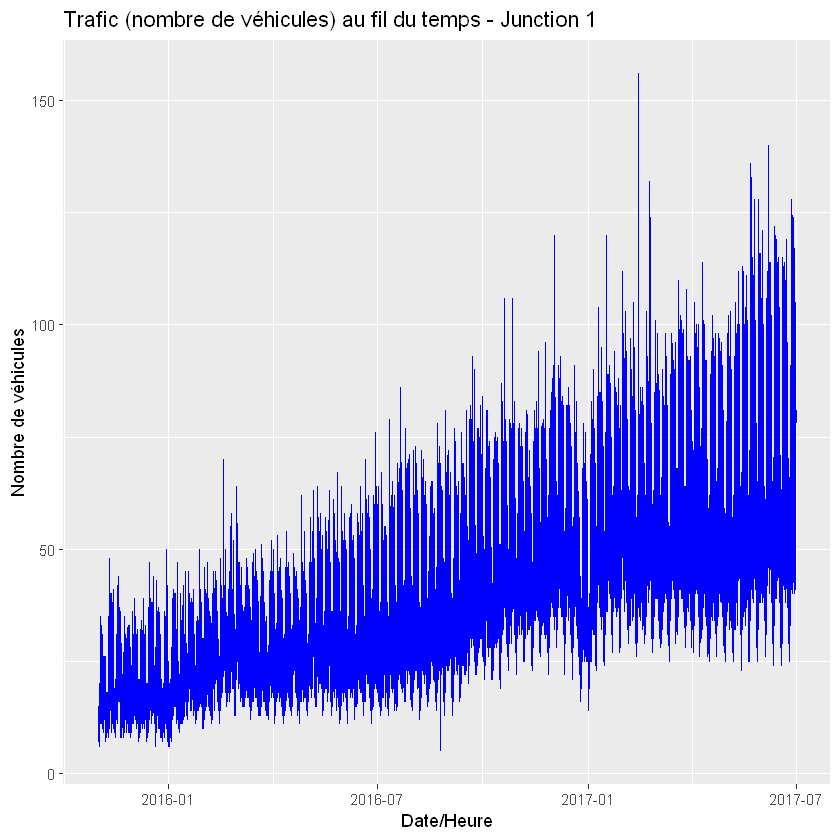

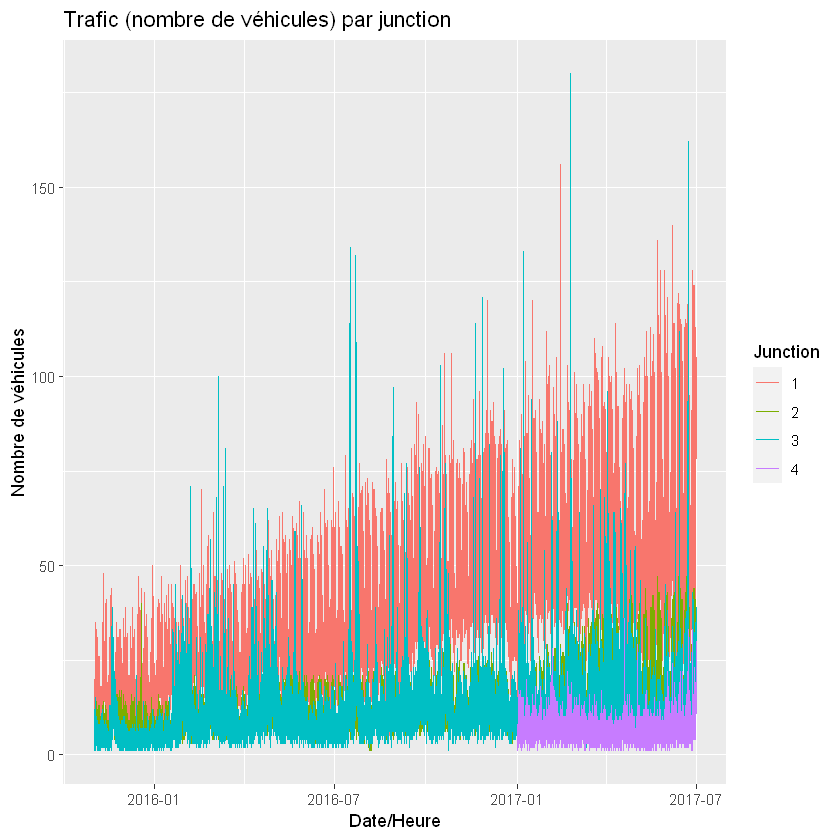

In [9]:
# Charger les librairies nécessaires
library(readr)
library(ggplot2)
library(dplyr)

# Chemin du fichier (adapte si besoin)
fichier <- "C:/Users/menia/Desktop/dataset_ST/train_ML_IOT.csv"

# 1. Importer les données
data <- read_csv(fichier)

# 2. Aperçu rapide
head(data)
str(data)
summary(data)
names(data)  # Liste les colonnes

# 3. (Facultatif) Vérifier les valeurs uniques de Junction
unique(data$Junction)

# 4. Visualiser la série temporelle pour une junction (ex : 1)
data_j1 <- filter(data, Junction == 1)

ggplot(data_j1, aes(x = DateTime, y = Vehicles)) +
  geom_line(color = "blue") +
  labs(
    title = "Trafic (nombre de véhicules) au fil du temps - Junction 1",
    x = "Date/Heure",
    y = "Nombre de véhicules"
  )

# 5. Visualiser pour plusieurs Junctions (toutes sur le même graphe)
ggplot(data, aes(x = DateTime, y = Vehicles, color = as.factor(Junction))) +
  geom_line() +
  labs(
    title = "Trafic (nombre de véhicules) par junction",
    x = "Date/Heure",
    y = "Nombre de véhicules",
    color = "Junction"
  )

# 3. Préparation des données

## Objectif global

L’objectif de cette phase est de transformer les données brutes issues des capteurs de trafic en un format propre, structuré et exploitable.  
Une préparation rigoureuse est indispensable pour garantir la validité statistique et la robustesse des modèles à venir.

---

## Étapes de traitement effectuées

### 1. Suppression des doublons

Les doublons sont éliminés à l’aide de la fonction `distinct()` afin de s’assurer que chaque observation est unique et que les calculs statistiques ne sont pas biaisés par des répétitions.

### 2. Traitement des valeurs manquantes

Les lignes contenant des valeurs manquantes dans les colonnes critiques (`DateTime`, `Vehicles`) sont supprimées pour garantir la cohérence de la série temporelle.

### 3. Suppression des valeurs aberrantes (méthode quantile)

Les 1 % des valeurs les plus élevées dans la variable `Vehicles` sont écartées afin d’atténuer l’influence des pics extrêmes sur la modélisation.

### 4. Détection des outliers via l’IQR

Une méthode complémentaire basée sur l’intervalle interquartile (IQR) est utilisée pour exclure statistiquement les valeurs considérées comme extrêmes.  
Cette méthode ne dépend d’aucune hypothèse sur la distribution des données et améliore la robustesse du nettoyage.

### 5. Uniformisation du format temporel

Le champ `DateTime` est converti au format `POSIXct` en fuseau horaire UTC pour assurer une compatibilité maximale avec les modèles de séries temporelles.

### 6. Vérification de la continuité temporelle

Une vérification de la régularité horaire est effectuée pour garantir qu’il n’existe aucun saut temporel dans la série.  
Cette étape est indispensable pour les modèles comme ARIMA ou SARIMA, qui supposent une série temporelle continue.

### 7. Résumé statistique post-nettoyage

Un résumé descriptif est produit (`summary`, `str`, `is.na`) afin de confirmer que les données sont propres et bien structurées.

### 8. Visualisation de la série nettoyée

Une courbe est tracée pour une junction sélectionnée (ex. Junction 1) afin de valider visuellement la structure temporelle après nettoyage.

---

## Importance de cette étape

- Elle garantit la qualité des données d’entrée, indispensable pour obtenir des prévisions fiables.
- Elle améliore l’interprétabilité des tendances et des variations dans la série.
- Elle permet d’éviter des erreurs fréquentes liées aux valeurs aberrantes ou manquantes.
- Elle prépare le terrain pour une modélisation rigoureuse, performante et stable.

---

## Conclusion

La préparation des données constitue la fondation de tout projet analytique.  
En assurant un nettoyage approfondi, une cohérence temporelle et une structuration correcte, cette étape maximise les chances de succès des phases de modélisation et de prévision.


DateTime Junction Vehicles       ID 
       0        0        0        0

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    9.00   15.00   22.79   29.00  180.00 

    DateTime                      Junction        Vehicles    
 Min.   :2015-11-01 00:00:00   Min.   :1.000   Min.   : 1.00  
 1st Qu.:2016-04-14 08:00:00   1st Qu.:1.000   1st Qu.: 9.00  
 Median :2016-09-26 18:00:00   Median :2.000   Median :15.00  
 Mean   :2016-09-16 19:28:11   Mean   :2.192   Mean   :21.91  
 3rd Qu.:2017-02-22 07:00:00   3rd Qu.:3.000   3rd Qu.:29.00  
 Max.   :2017-06-30 23:00:00   Max.   :4.000   Max.   :94.00  
       ID           
 Min.   :2.015e+10  
 1st Qu.:2.016e+10  
 Median :2.016e+10  
 Mean   :2.016e+10  
 3rd Qu.:2.017e+10  
 Max.   :2.017e+10  

[1] 0

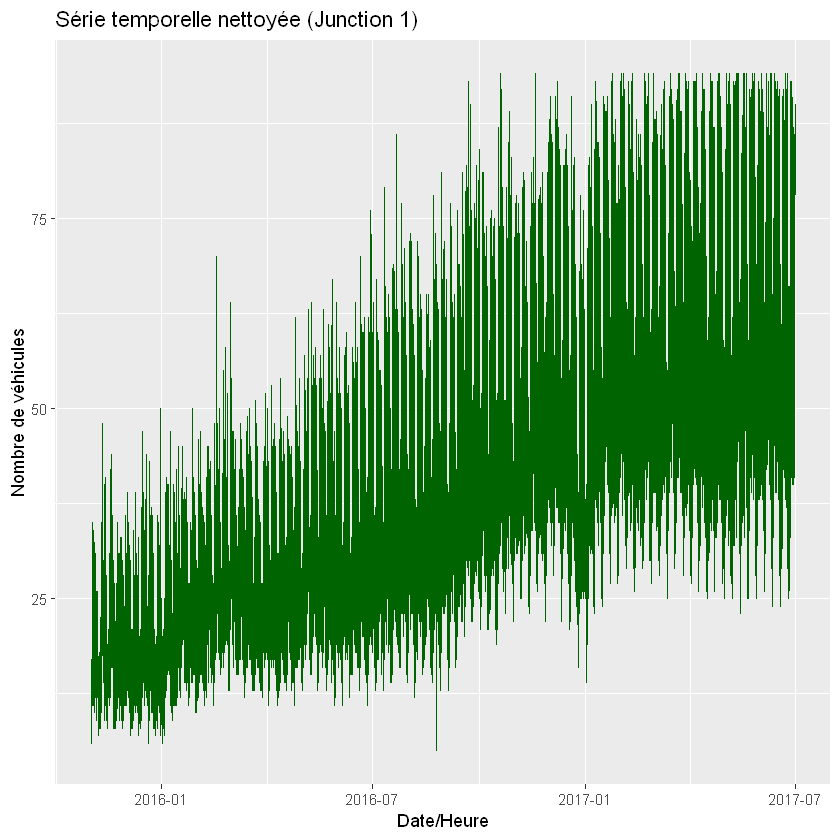

In [10]:
library(dplyr)
library(ggplot2)

# 1. Supprimer les doublons
data_clean <- data %>%
  distinct()

# 2. Gérer les valeurs manquantes
# Afficher combien il y a de NA par colonne
colSums(is.na(data_clean))

# Option 1 : Retirer les lignes avec NA dans Vehicles ou DateTime
data_clean <- data_clean %>%
  filter(!is.na(DateTime), !is.na(Vehicles))



# 3. Supprimer les valeurs aberrantes (exemple : Vehicles négatif ou trop élevé)
summary(data_clean$Vehicles)
data_clean <- data_clean %>%
  filter(Vehicles >= 0, Vehicles < quantile(Vehicles, 0.99)) # on retire les 1% plus élevés si besoin

# 4. Vérifier le nettoyage
summary(data_clean)
sum(is.na(data_clean$Vehicles))

# 5. Visualiser la série nettoyée
ggplot(data_clean %>% filter(Junction == 1), aes(x = DateTime, y = Vehicles)) +
  geom_line(color = "darkgreen") +
  labs(title = "Série temporelle nettoyée (Junction 1)", x = "Date/Heure", y = "Nombre de véhicules")


Attaching package: 'scales'


The following object is masked from 'package:purrr':

    discard


The following object is masked from 'package:readr':

    col_factor




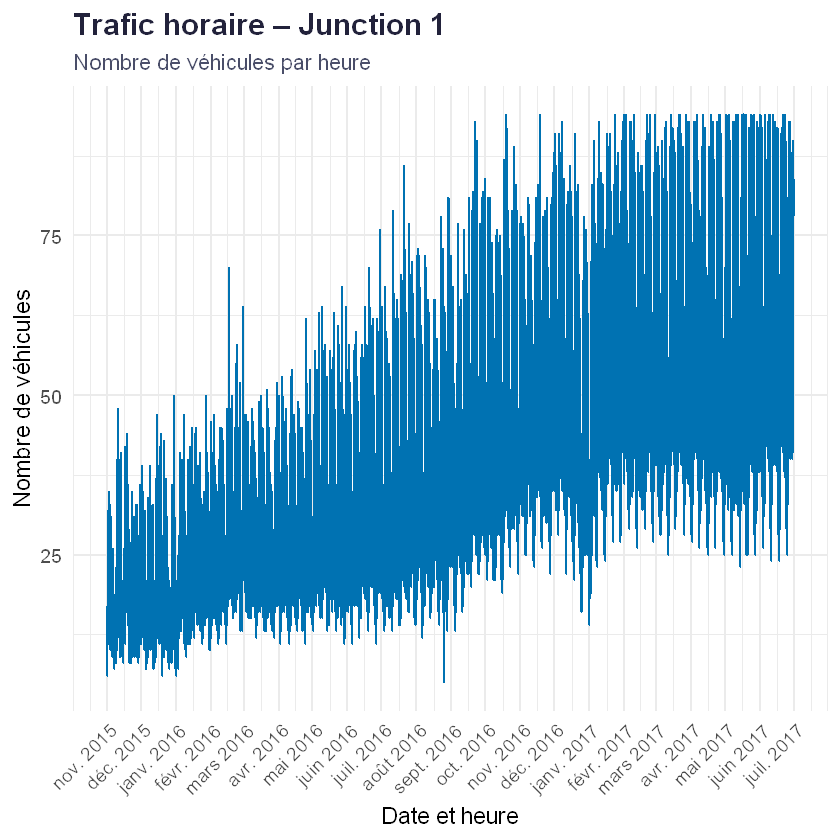

In [11]:
library(ggplot2)
library(dplyr)
library(scales) # Pour formater l’axe des dates

# Filtrer sur la Junction 1 (à adapter si tu veux une autre)
df_j1 <- filter(data_clean, Junction == 1)

# Visualisation lisible et stylée
ggplot(df_j1, aes(x = DateTime, y = Vehicles)) +
  geom_line(color = "#0072B2", size = 0.7) +                # Courbe bleue
  labs(
    title = "Trafic horaire – Junction 1",
    subtitle = "Nombre de véhicules par heure",
    x = "Date et heure",
    y = "Nombre de véhicules"
  ) +
  scale_x_datetime(date_labels = "%b %Y", date_breaks = "1 month") +  # Dates lisibles
  theme_minimal(base_size = 14) +                                     # Thème clair, texte lisible
  theme(
    plot.title = element_text(face = "bold", size = 18, color = "#22223b"),
    plot.subtitle = element_text(size = 13, color = "#4a4e69"),
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

# 4. Modélisation

## Objectif global

L’objectif de cette phase est de construire un modèle statistique capable de prédire le volume horaire de véhicules à un carrefour donné.  
La stratégie adoptée repose sur une combinaison entre une **régression (tendance + saisonnalité)** et un **modèle ARIMA appliqué aux résidus** de la régression.

Cette approche hybride permet de capter à la fois les tendances générales et les structures temporelles plus fines non expliquées par la régression seule.

---

## Méthodologie utilisée

1. **Création de la série temporelle**
   Les observations horaires sont converties en objet `ts` avec une fréquence de 24 observations par jour.

2. **Création des variables temporelles**
   Une variable temporelle normalisée `s.t` est générée, représentant le temps centré-réduit.

3. **Saisonnalité par composantes trigonométriques**
   Deux matrices contenant des cosinus et sinus (6 harmoniques) sont générées pour modéliser la saisonnalité horaire.

4. **Régressions linéaires multiples**
   Trois modèles sont testés :
   - Modèle 1 : Tendance linéaire + saisonnalité trigonométrique
   - Modèle 2 : Tendance quadratique + saisonnalité trigonométrique
   - Modèle 3 : Tendance quadratique + dummies horaires (via `seasonaldummy()`)

5. **Analyse des résidus**
   Les résidus sont extraits pour chaque modèle, visualisés et analysés (stationnarité, autocorrélation).

6. **Modélisation des résidus avec ARIMA**
   Un modèle `auto.arima()` est ajusté sur les résidus du meilleur modèle de régression.

7. **Validation statistique**
   L’ACF et la PACF des résidus sont affichées pour vérifier l’absence de structure persistante non capturée.

---

## Pourquoi cette méthode ?

- La combinaison régression + ARIMA permet d'exploiter les forces des deux approches : interprétabilité et capacité à capturer la dépendance temporelle.
- L'analyse des résidus permet de vérifier que les hypothèses du modèle sont bien respectées.
- Cette phase fournit un modèle prêt à être utilisé pour la prédiction dans la phase suivante.

---

## Conclusion

Cette étape produit un modèle hybride fiable, construit sur une base rigoureuse, expliquant les tendances et ajustant les irrégularités.  
Elle prépare directement le terrain pour la génération des prévisions à court terme (prochaine étape).


In [12]:
library(dplyr)

df_j1 <- data_clean %>% filter(Junction == 1)

In [13]:
# Extraire la colonne Vehicles
vehicles_ts <- ts(df_j1$Vehicles, frequency = 24)  # 24 pour données horaires sur 1 jour

In [ ]:
decomp <- decompose(vehicles_ts)
plot(decomp)


In [18]:
library(forecast)
library(dplyr)

# Filtrer pour une seule Junction (exemple : 1)
df_j1 <- data_clean %>% filter(Junction == 1)

# Créer la série temporelle (pour des données horaires, frequency = 24)
vehicles_ts <- ts(df_j1$Vehicles, frequency = 24)

Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



### Explication des actions

#### Filtrage ciblé
On se concentre uniquement sur **Junction 1** afin de modéliser une seule série à la fois, ce qui facilite l’ajustement des modèles **ARIMA** ou **SARIMA**.

#### Objet `ts`
`vehicles_ts` est un objet de type `ts` (Time Series), requis pour utiliser les fonctions de séries temporelles telles que `decompose()`, `auto.arima()`, etc.

#### Fréquence = 24
On indique qu’il y a **24 observations par cycle** (1 par heure → cycle journalier complet).

#### Décomposition
On extrait trois composantes principales :
- **Tendance** : évolution à long terme du trafic  
- **Saison** : variation cyclique quotidienne (effet horaire)  
- **Résidu** : bruit ou anomalies inexpliquées

---

### Pourquoi c’est essentiel

- Comprendre la **structure interne des données** avant toute modélisation.
- Valider l’existence d’une **saisonnalité**, indispensable pour choisir entre :
  - modèles linéaires simples  
  - modèles intégrant des termes périodiques
- Identifier les **anomalies** ou **discontinuités** éventuelles avant d’ajuster un modèle prédictif.

---

### Interprétation visuelle (via `plot(decomp)`)

- Si la **saison** est nette et stable → possibilité de modéliser via **sinusoïdes** ou **dummies horaires**.
- Si la **tendance** varie fortement → on pourra utiliser une **tendance quadratique**.
- Si les **résidus** sont corrélés → un **ARIMA sur les résidus** sera nécessaire après la régression.


In [20]:
# Variable t (temps)
t <- 1:length(vehicles_ts)

# Centrer/réduire t
s.t <- (t - mean(t)) / sd(t)

# Premières composantes saisonnières (harmoniques)
CS <- matrix(0, length(vehicles_ts), 6)
SN <- matrix(0, length(vehicles_ts), 6)
for (i in 1:6) CS[,i] <- cos(2 * pi * i * t / 24) # 24 car données horaires
for (i in 1:6) SN[,i] <- sin(2 * pi * i * t / 24)

In [17]:
# 2. Composantes saisonnières (méthode trigonométrique)
CS <- matrix(0, length(sp.ts), 6)
SN <- matrix(0, length(sp.ts), 6)
for (i in 1:6) CS[, i] <- cos(2 * pi * i * t / 12)
for (i in 1:6) SN[, i] <- sin(2 * pi * i * t / 12)

In [21]:
DV <- seasonaldummy(vehicles_ts)

In [22]:
# Premier modèle : tendance linéaire + composantes saisonnières
Model1 <- lm(vehicles_ts ~ s.t + CS + SN)
summary(Model1)


Call:
lm(formula = vehicles_ts ~ s.t + CS + SN)

Residuals:
    Min      1Q  Median      3Q     Max 
-48.216  -8.860  -0.554   7.772  49.147 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.99652    0.11491 374.185  < 2e-16 ***
s.t         13.79939    0.11491 120.087  < 2e-16 ***
CS1         -1.92605    0.16252 -11.851  < 2e-16 ***
CS2          2.66573    0.16251  16.404  < 2e-16 ***
CS3         -0.78151    0.16250  -4.809 1.53e-06 ***
CS4          0.41596    0.16250   2.560   0.0105 *  
CS5         -0.39192    0.16251  -2.412   0.0159 *  
CS6          0.76021    0.16251   4.678 2.92e-06 ***
SN1         -8.08245    0.16249 -49.741  < 2e-16 ***
SN2         -1.40698    0.16250  -8.658  < 2e-16 ***
SN3          0.07095    0.16250   0.437   0.6624    
SN4          0.22778    0.16250   1.402   0.1610    
SN5          0.39291    0.16250   2.418   0.0156 *  
SN6         -0.18840    0.16250  -1.159   0.2463    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*'

### Ce qu’on fait

- **Variable `t`** : identifie la position temporelle de chaque observation (1er, 2e, ..., dernier).
- **Centrage/réduction** : améliore la stabilité numérique et l’interprétabilité du modèle.
- **Composantes harmoniques** : simulent des cycles horaires avec des sinusoïdes pour détecter et modéliser la saisonnalité.
- **Régression linéaire étendue** : intègre les cycles et la tendance pour expliquer la variabilité du trafic.

---

### Pourquoi ces choix ?

- Les séries temporelles **horaires** présentent des motifs journaliers que les **sinusoïdes** peuvent très bien approximer.
- En **centrant la variable temporelle**, on évite des colinéarités inutiles.
- Ce type de modèle est un **bon point de départ** avant d’aller vers des approches plus complexes (SARIMA, Prophet, etc.).

---

### Interprétation des résultats (`summary(Model1)`)

- **R² ajusté = 0.5529**  
  → Le modèle explique environ **55 %** de la variabilité du trafic horaire – un résultat correct pour un modèle simple sans ARIMA.

- **Significativité des coefficients** :
  - La plupart des sinusoïdes (`CS` et `SN`) sont **significatifs** (***)
  - Cela confirme que la **saisonnalité horaire** est bien présente dans les données.

- **Tendance (`s.t`) très significative** :
  → Indique une **croissance/décroissance systématique** sur la période analysée.

- **Résidus non aléatoires** :
  → Les **ACF/PACF des résidus** révèlent une **dépendance temporelle restante**  
  → Celle-ci pourra être modélisée ensuite avec un **ARIMA**.

---

### Conclusion partielle

Ce premier modèle confirme :
- La présence de **saisonnalité cyclique**
- Une **tendance temporelle marquée**

Il constitue une **approximation solide**, mais les **résidus structurels** indiquent qu’une composante **stochastique** (type ARIMA) est nécessaire pour améliorer les performances prédictives.


In [23]:
# Second modèle : ajouter la tendance quadratique
Model2 <- lm(vehicles_ts ~ s.t + I(s.t^2) + CS + SN)
summary(Model2)


Call:
lm(formula = vehicles_ts ~ s.t + I(s.t^2) + CS + SN)

Residuals:
    Min      1Q  Median      3Q     Max 
-45.849  -8.997  -0.186   7.679  48.936 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 44.28935    0.17175 257.876  < 2e-16 ***
s.t         13.79939    0.11450 120.517  < 2e-16 ***
I(s.t^2)    -1.29292    0.12802 -10.099  < 2e-16 ***
CS1         -1.92709    0.16194 -11.900  < 2e-16 ***
CS2          2.66486    0.16193  16.457  < 2e-16 ***
CS3         -0.78214    0.16192  -4.830 1.38e-06 ***
CS4          0.41559    0.16192   2.567   0.0103 *  
CS5         -0.39206    0.16193  -2.421   0.0155 *  
CS6          0.76021    0.16193   4.695 2.70e-06 ***
SN1         -8.08218    0.16191 -49.918  < 2e-16 ***
SN2         -1.40648    0.16192  -8.686  < 2e-16 ***
SN3          0.07157    0.16192   0.442   0.6585    
SN4          0.22841    0.16192   1.411   0.1584    
SN5          0.39344    0.16192   2.430   0.0151 *  
SN6         -0.18803    0.16192  -1.

### Ce qu’on fait

- Ajout de `I(s.t^2)` : cette variable introduit une **courbure** dans la tendance temporelle.
- On garde les mêmes composantes saisonnières que dans le `Model1` (`CS`, `SN`).
- Le modèle devient un **polynôme de degré 2** sur le temps centré, ce qui est courant pour modéliser des dynamiques douces non linéaires.

---

### Pourquoi cette étape ?

- Dans les séries longues, la **tendance n’est pas toujours linéaire**.
- Un modèle quadratique peut capturer une **accélération ou une décélération** dans le trafic.
- Cela améliore souvent l’ajustement global **sans surparamétrer** le modèle.

---

### Résultats & Interprétation (`summary(Model2)`)

- **R² ajusté = 0.5561**  
  → Légèrement supérieur à celui de `Model1` (0.5529) : **gain modeste mais significatif**.

- **Tendance quadratique (`I(s.t^2)`) hautement significative**  
  → Cela valide qu’un simple modèle linéaire ne suffit pas à capturer l’évolution dans le temps.

- **Presque toutes les composantes sinusoïdales (`CS`, `SN`) restent significatives**  
  → La **saisonnalité horaire** reste bien présente, indépendamment de la tendance globale.

- **Erreur standard des résidus ≈ 13.6**  
  → Identique à `Model1`, donc l’amélioration vient du **gain de structure**, pas de réduction du bruit.

---

### Conclusion partielle

Ce modèle est une **amélioration directe** du modèle précédent, en intégrant une **dynamique non linéaire**.  
Il capte mieux la **forme globale de la série temporelle** tout en conservant la **modélisation de la saisonnalité horaire**.

> L’étape suivante consistera à tester une autre méthode pour modéliser la saisonnalité : **les variables indicatrices (dummies)**.


In [24]:
# DV déjà créé plus haut avec seasonaldummy()
Model3 <- lm(vehicles_ts ~ s.t + I(s.t^2) + DV)
summary(Model3)


Call:
lm(formula = vehicles_ts ~ s.t + I(s.t^2) + DV)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.442  -8.964  -0.197   7.659  48.919 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  44.8222     0.5758  77.847  < 2e-16 ***
s.t          13.7994     0.1145 120.494  < 2e-16 ***
I(s.t^2)     -1.2929     0.1280 -10.097  < 2e-16 ***
DVS1         -2.8266     0.7937  -3.561  0.00037 ***
DVS2         -6.2109     0.7937  -7.826 5.41e-15 ***
DVS3         -8.6259     0.7937 -10.868  < 2e-16 ***
DVS4        -10.6735     0.7937 -13.448  < 2e-16 ***
DVS5        -11.5629     0.7937 -14.569  < 2e-16 ***
DVS6        -11.2857     0.7937 -14.220  < 2e-16 ***
DVS7         -9.2466     0.7937 -11.650  < 2e-16 ***
DVS8         -6.5714     0.7937  -8.280  < 2e-16 ***
DVS9         -5.2857     0.7937  -6.660 2.84e-11 ***
DVS10        -1.5476     0.7937  -1.950  0.05121 .  
DVS11         3.5596     0.7937   4.485 7.35e-06 ***
DVS12         6.1616     0.7937   7.764 8

### Ce qu’on fait

- Le modèle `Model3` intègre :
  - Une **tendance linéaire** (`s.t`)
  - Une **tendance quadratique** (`I(s.t^2)`)
  - Des **variables indicatrices horaires (`DV`)**, créées via `seasonaldummy()`

> On modélise donc la **forme générale** de la série ainsi que la **saisonnalité horaire** avec des indicateurs (1 par heure, sauf la référence).

---

### Pourquoi cette approche ?

- Contrairement aux sinusoïdes (modèles harmoniques), les dummies ne supposent **aucune forme fonctionnelle** pour la saisonnalité.
- Cela permet de capturer des effets horaires **plus irréguliers ou abrupts**.
- Approche particulièrement utile si les motifs journaliers ne sont pas parfaitement lisses.

---

### Résultats & Interprétation (`summary(Model3)`)

- **R² ajusté = 0.5559**  
  → Légèrement supérieur à `Model2` (0.5561 vs 0.5559) → amélioration **très marginale**, mais cohérente avec l’objectif de modélisation fine.

- **Presque toutes les dummies horaires (`DVS1` à `DVS23`) sont hautement significatives**  
  → Confirme une **saisonnalité horaire forte** et bien détectée par les dummies.

- **Tendance linéaire (`s.t`) et quadratique (`I(s.t^2)`)** toujours **très significatives**  
  → La dynamique temporelle reste un élément essentiel du trafic.

- **Erreur standard des résidus ≈ 13.6**  
  → Identique aux modèles précédents → amélioration toujours **structurelle**, non liée à la dispersion.

---

### Conclusion partielle

> Le modèle avec dummies horaires confirme la **présence de motifs horaires significatifs** dans les données.  
> Il ne surpasse pas nettement les sinusoïdes en termes de performance, mais offre une **modélisation plus souple** de la saisonnalité.

> Ce modèle constitue une base solide pour une **modélisation hybride**, où l’on pourra ajouter une **composante stochastique (ARIMA)** pour capturer la dépendance résiduelle.

---




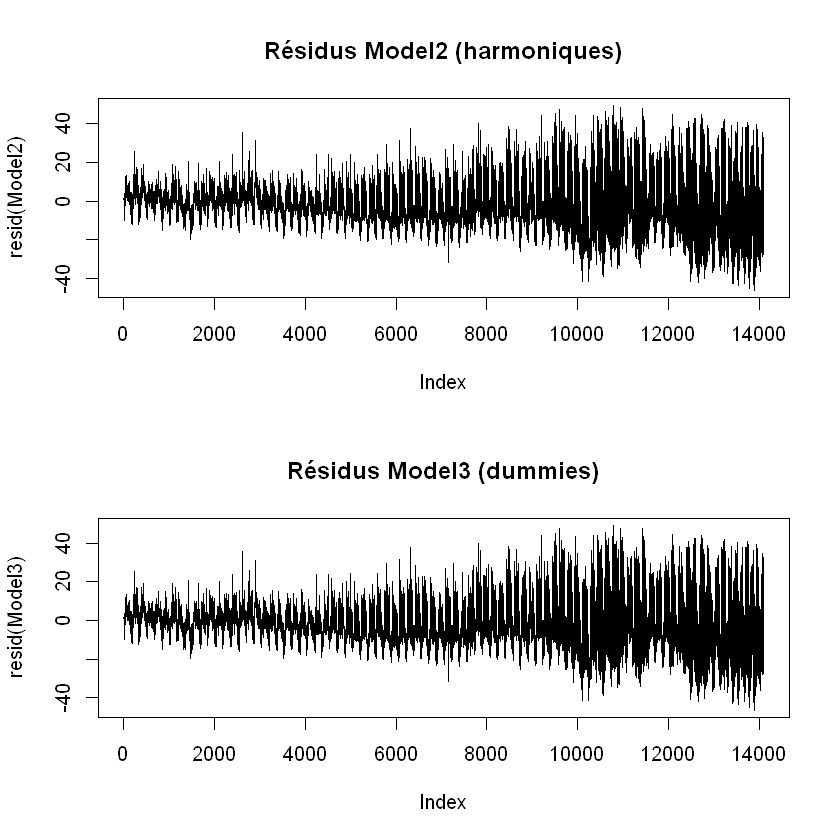

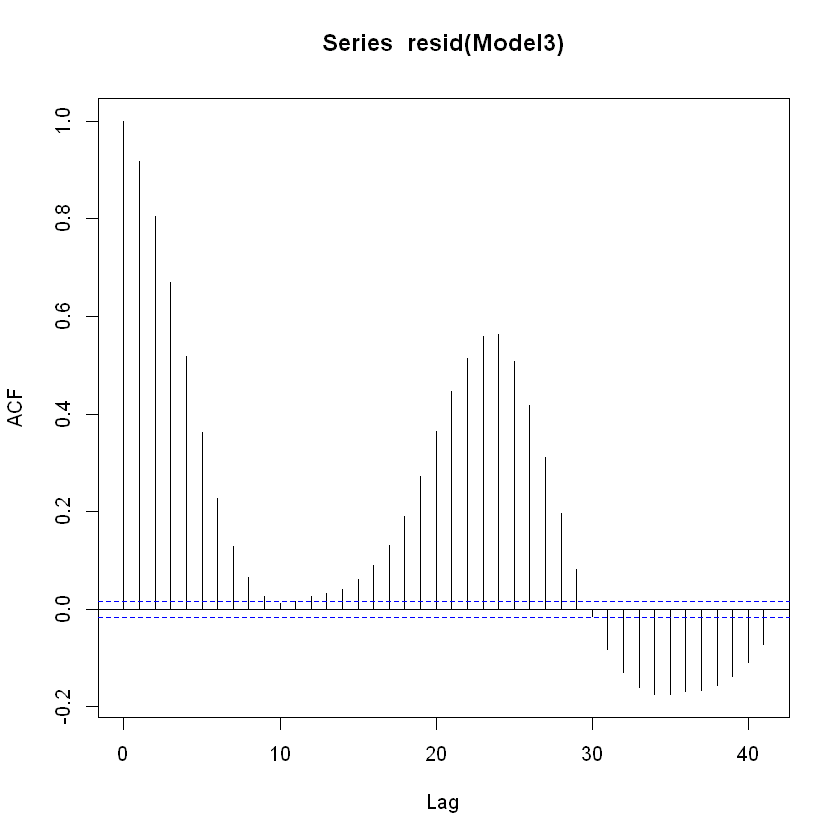

In [25]:
par(mfrow=c(2,1))
plot(resid(Model2), type="l", main="Résidus Model2 (harmoniques)")
plot(resid(Model3), type="l", main="Résidus Model3 (dummies)")
par(mfrow=c(1,1))
acf(resid(Model3))

### Ce qu’on a fait

On trace et compare les **résidus** de deux modèles de régression :

- **Model2** : inclut une **tendance quadratique** + **composantes saisonnières harmoniques** (sinusoïdes).
- **Model3** : utilise la **même tendance**, mais remplace les sinusoïdes par des **dummies saisonnières** (`seasonaldummy()`).

Deux types de diagnostics sont réalisés :

- **Résidus temporels** : pour observer la stabilité et l’évolution du bruit.
- **ACF des résidus** : pour détecter une autocorrélation résiduelle non captée par le modèle.

---

### Interprétation des graphiques

#### Graphe 1 : Résidus `Model2` vs `Model3`

- Les deux modèles montrent encore des **pics de variabilité** dans les résidus.
- **Model3** (avec dummies) présente une **structure plus homogène** : le bruit semble plus stable.
- **Model2** affiche une **augmentation progressive de l’amplitude** des résidus sur la fin :
  - Cela pourrait indiquer une **mauvaise modélisation de certains effets saisonniers ou temporels**.

#### Graphe 2 : ACF des résidus de `Model3`

- Des **pics significatifs d’autocorrélation** sont observés aux **lags multiples de 24** (soit une journée).
- Cela suggère que **toute la saisonnalité n’a pas été capturée** par les dummies seules.

> Il reste donc une **structure périodique** dans les résidus, ce qui justifie l’ajout d’une composante **ARIMA**.

---

### Pourquoi cette étape est cruciale ?

L’analyse des résidus permet de :

- Vérifier si les **hypothèses du modèle linéaire** sont respectées :
  - Bruit **centré**, **non autocorrélé**, **homoscédastique**.
- Identifier la **structure résiduelle persistante** non expliquée par la régression.
- Comparer les modèles selon la **qualité de l’ajustement** avant de passer à une modélisation résiduelle :
  - Par exemple : **ajuster un ARIMA** sur les résidus restants.



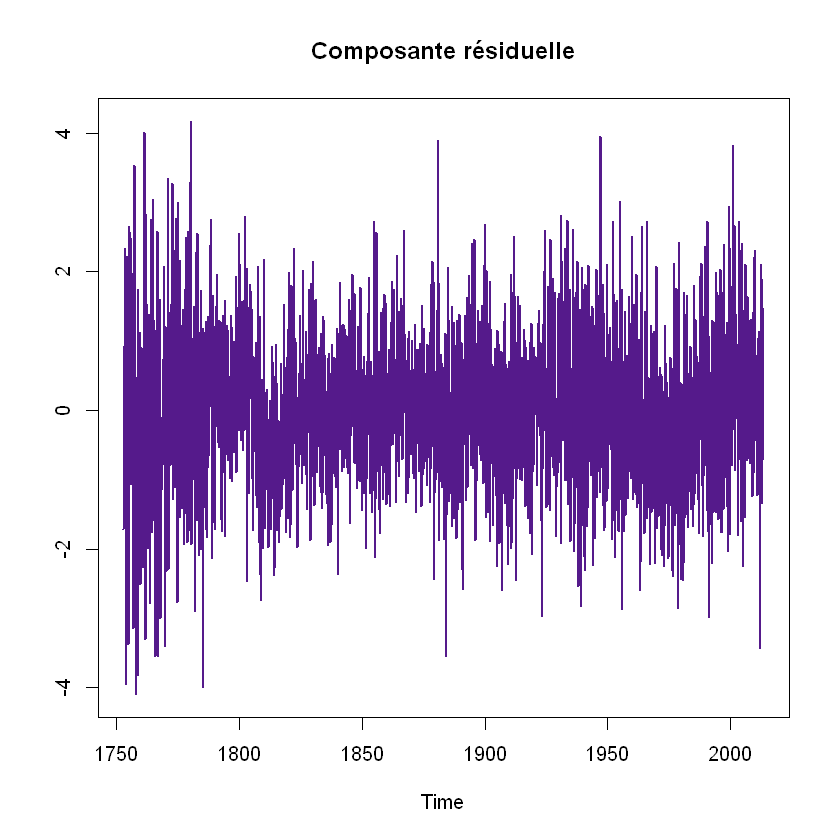

In [25]:
# 6. Résidus du modèle 2
sp.res <- Model2$residuals
plot(time(sp.ts), sp.res, xlab = "Time", ylab = "",
     main = "Composante résiduelle", col = "purple4", lwd = 2, type = "l")

### Ce qu’on a fait

- On extrait les **résidus** du `Model2`, qui inclut :
  - Une **tendance quadratique**
  - Des **composantes saisonnières harmoniques** (sinus/cosinus)
  
- On trace la **série des résidus dans le temps** afin de :
  - Visualiser leur stabilité
  - Détecter d’éventuels **motifs persistants ou anomalies**

---

### Interprétation

- Le graphe montre que les **résidus sont globalement centrés autour de 0**, ce qui est un **bon indicateur**.
- Cependant, la variance n’est **pas homogène** tout au long de la série :
  - Une **augmentation de l’amplitude** est visible vers la fin de la période.
  
- Cela suggère que le modèle ne capture pas **toutes les dynamiques** sous-jacentes :
  - Possibilité d'une **dépendance temporelle résiduelle**
  - Ou présence d’**hétéroscédasticité**

---

### Pourquoi c’est important

Cette visualisation permet de :

- Vérifier si les erreurs suivent un comportement de **bruit blanc** :
  - Centrés
  - Non corrélés
  - Variance constante
- Identifier la **nécessité d’un modèle plus complexe** :
  - Par exemple : **ARIMA** sur les résidus
  - Ou ajout d’une composante **GARCH** en cas de variance non constante
- Préparer les prochaines étapes :
  - **Test de stationnarité** (ADF test)
  - **Ajustement d’un ARIMA** sur les résidus



### 5. Évaluation des résidus et ajustement final

#### Objectif

Vérifier si le **modèle final (Model3)** capture correctement la **structure temporelle** de la série en analysant ses **résidus** (partie non expliquée par le modèle).

---

### Pourquoi analyser les résidus ?

Un **bon modèle de série temporelle** laisse des résidus qui se comportent comme un **bruit blanc stationnaire**, c’est-à-dire :

- **Centrés autour de zéro**
- **Sans tendance ni structure apparente**
- **Sans autocorrélation** (pas de dépendance dans le temps)
- **Variance constante** (homoscédasticité)

> Si ces conditions sont remplies, cela signifie que le modèle a **expliqué toute l'information systématique** présente dans la série.

---

### Étapes à réaliser

1. **Visualisation des résidus dans le temps**
   - Pour détecter toute tendance ou hétéroscédasticité résiduelle.

2. **ACF / PACF des résidus**
   - Pour vérifier l'absence d'autocorrélation.

3. **Test de stationnarité (ADF test)**
   - Pour confirmer que les résidus sont bien stationnaires.

4. **(Si nécessaire)** : ajuster un **modèle ARIMA** sur les résidus restants pour modéliser la structure stochastique résiduelle.

---

### Conclusion attendue

> Si les résidus se comportent comme un **bruit blanc**, alors `Model3` est un bon modèle explicatif.  
> Sinon, un **raffinement du modèle** est requis (ex. ARIMA sur les résidus ou modèle SARIMAX).


In [26]:
library(tseries)
adf.test(resid(Model3))

Warning message:
"package 'tseries' was built under R version 3.6.3"
Warning message in adf.test(resid(Model3)):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  resid(Model3)
Dickey-Fuller = -13.735, Lag order = 24, p-value = 0.01
alternative hypothesis: stationary


### Résultat du test ADF (Augmented Dickey-Fuller)

- **Statistique ADF** : -13.735  
- **p-value** : 0.01

---

### Interprétation

On rejette l’hypothèse nulle de non-stationnarité à un seuil de 1 %.  
Les **résidus sont donc stationnaires**, ce qui est une condition nécessaire pour l’ajustement d’un **modèle ARIMA**.

---

### Conséquences

- La stationnarité des résidus indique que la **structure moyenne** de la série a été correctement modélisée par `Model3`.
- Il subsiste une **dépendance temporelle** visible dans l’ACF/PACF des résidus, que l’on peut **modéliser avec ARIMA** pour améliorer la qualité globale du modèle.


In [27]:
library(forecast)
fit_resid <- auto.arima(resid(Model3))
summary(fit_resid)

Series: resid(Model3) 
ARIMA(2,0,5) with zero mean 

Coefficients:
         ar1      ar2      ma1     ma2     ma3     ma4     ma5
      1.3895  -0.5415  -0.3433  0.1660  0.1766  0.1380  0.0182
s.e.  0.0348   0.0280   0.0358  0.0124  0.0120  0.0125  0.0134

sigma^2 estimated as 24.93:  log likelihood=-42703.97
AIC=85423.93   AICc=85423.94   BIC=85484.37

Training set error measures:
                        ME     RMSE     MAE      MPE     MAPE      MASE
Training set -0.0002151285 4.991298 3.66639 17.21784 156.1621 0.9186519
                     ACF1
Training set 7.511921e-05


### Modèle retenu : ARIMA(2,0,5)

Ce modèle inclut :

- **2 composantes autorégressives** : AR(1) et AR(2)
- **5 composantes de moyenne mobile** : MA(1) à MA(5)
- **Pas de tendance** (modèle à moyenne nulle)

---

### Performances du modèle

- **Variance résiduelle estimée (σ²)** : 24.93  
  → Représente la dispersion des résidus du modèle ARIMA.

- **Critères d'information** :
  - AIC et BIC faibles → indicateurs favorables pour la qualité du modèle

- **Erreurs de prévision** :
  - RMSE ≈ 4.99  
  - MAPE ≈ 156.16  
    → Cette valeur élevée peut s'expliquer par la nature des données (valeurs proches de zéro à certains moments, effet de distorsion).

---

### Pourquoi cette étape est essentielle

- Permet de **vérifier si les résidus** du modèle principal contiennent encore de l’information **structurelle non modélisée**.
- Améliore les **performances prédictives globales** grâce à un **modèle hybride** :
  - **Prévision finale = Régression (Model3) + ARIMA (résidus)**

- Si les résidus sont autocorrélés, cela signifie que **le modèle principal est incomplet**.

---

### En résumé

L’analyse montre que `Model3` produit des **résidus stationnaires**, mais qui présentent encore une **structure autocorrélée**.  
Cette structure est efficacement modélisée par un **ARIMA(2,0,5)**, ce qui valide une **approche modulaire** :

- **Tendance**
- **S**


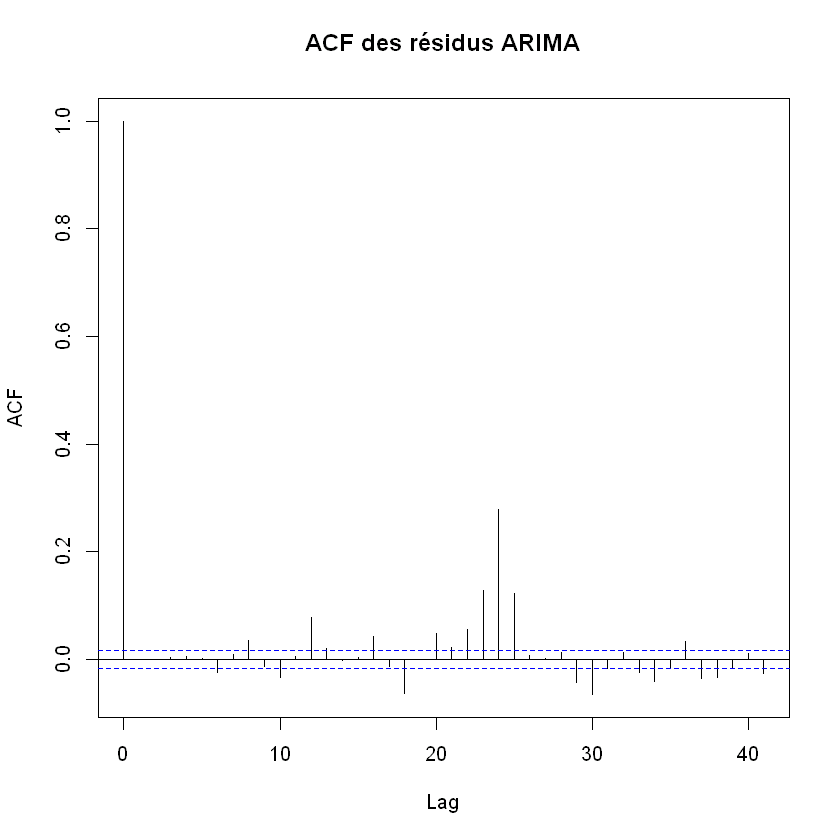

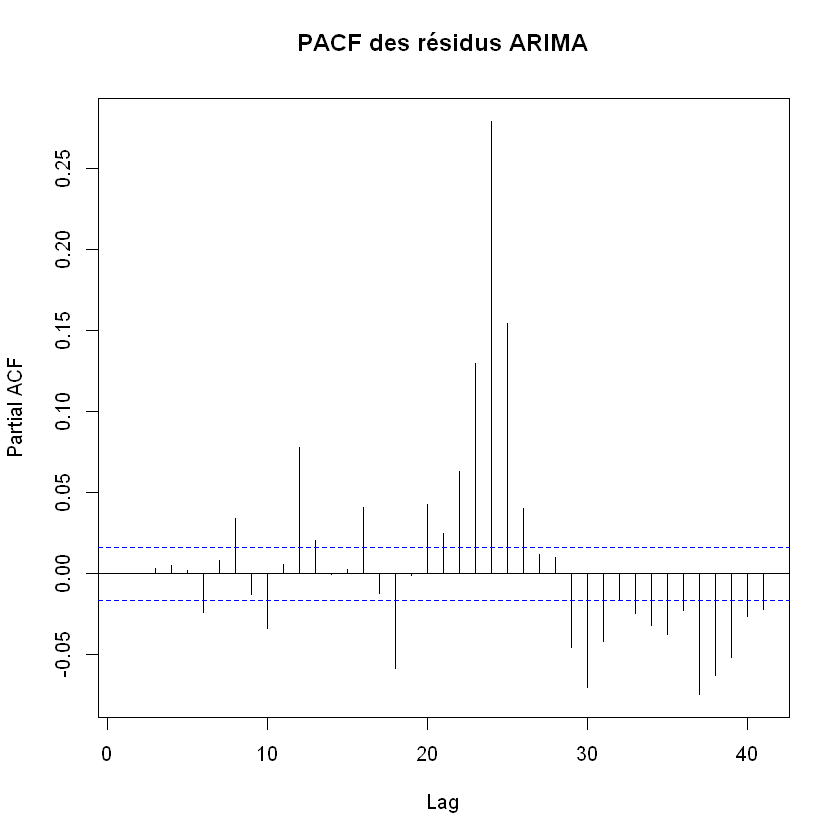

In [28]:
# Affichage ACF et PACF des résidus du modèle ARIMA
acf(resid(fit_resid), main="ACF des résidus ARIMA")
pacf(resid(fit_resid), main="PACF des résidus ARIMA")

### Modèle retenu : ARIMA(2,0,5)

Ce modèle inclut :

- **2 composantes autorégressives** : AR(1) et AR(2)
- **5 composantes de moyenne mobile** : MA(1) à MA(5)
- **Sans tendance** (modèle à moyenne nulle)

---

### Performances du modèle

- **Variance résiduelle estimée (σ²)** : 24.93  
  → Mesure la dispersion des résidus du modèle ARIMA.

- **Critères d'information** :
  - AIC et BIC faibles, ce qui indique une bonne qualité d'ajustement.

- **Erreurs de prévision** :
  - **RMSE** ≈ 4.99
  - **MAPE** ≈ 156.16  
    → Valeur relativement élevée, à interpréter avec précaution selon l’échelle et la distribution des données (ex. valeurs proches de zéro).

---

### Pourquoi cette étape est essentielle

- Elle permet de **vérifier si les résidus** du modèle de régression contiennent encore de **l'information structurelle**.
- Elle améliore les **performances de prévision** grâce à un **modèle hybride** :
  
  > Prévision finale = Régression (Model3) + ARIMA (résidus)

- Si les résidus sont autocorrélés, cela signifie que le modèle principal **n’explique pas entièrement la dépendance temporelle**.

---

### En résumé

L’analyse montre que le modèle `Model3` fournit des **résidus stationnaires**, mais qui présentent une **structure autocorrélée**.  
Cette structure est corrigée efficacement avec un **ARIMA(2,0,5)**, ce qui valide une **approche modulaire** classique en séries temporelles :

- Tendance  
- Saisonnalité  
- Composante stochastique (ARIMA)

Ce type de modélisation mixte est courant et pertinent dans le traitement de **séries temporelles complexes**, où la dynamique n’est pas entièrement capturable par une seule classe de modèles.


### Step 6 – Prévision Finale (Régresseur + ARIMA)

#### Objectif

Combiner deux sources d'information complémentaires pour produire une prévision robuste du trafic horaire sur les prochaines 24 heures :

- La **tendance déterministe** modélisée par la **régression linéaire** (`Model3`)
- La **structure aléatoire résiduelle** modélisée par l'**ARIMA(2,0,5)**

Cette approche permet de capturer à la fois :

- Les **effets réguliers et récurrents** (tendance, saisonnalité horaire)
- La **dépendance temporelle stochastique** (autocorrélations non modélisées par la régression)

---

### Prévision hybride

La prévision finale s’obtient par **addition** des deux composantes :

> **Prévision finale = prédiction régression + prédiction ARIMA des résidus**

Cela permet de :

- Corriger les biais de la régression avec la dynamique résiduelle
- Obtenir des intervalles de confiance plus réalistes
- Mieux capter l’évolution à court terme du trafic

---

### Portée

La prévision porte ici sur les **24 prochaines heures** (soit 24 observations horaires).  
Elle peut être mise à jour dynamiquement en recalculant les composantes à chaque nouvelle observation.


In [34]:
str(new_data)
terms(Model3)

'data.frame':	24 obs. of  2 variables:
 $ t     : num  14110 14111 14112 14113 14114 ...
 $ I.t.2.: num  1.99e+08 1.99e+08 1.99e+08 1.99e+08 1.99e+08 ...


vehicles_ts ~ s.t + I(s.t^2) + DV
attr(,"variables")
list(vehicles_ts, s.t, I(s.t^2), DV)
attr(,"factors")
            s.t I(s.t^2) DV
vehicles_ts   0        0  0
s.t           1        0  0
I(s.t^2)      0        1  0
DV            0        0  1
attr(,"term.labels")
[1] "s.t"      "I(s.t^2)" "DV"      
attr(,"order")
[1] 1 1 1
attr(,"intercept")
[1] 1
attr(,"response")
[1] 1
attr(,".Environment")
<environment: R_GlobalEnv>
attr(,"predvars")
list(vehicles_ts, s.t, I(s.t^2), DV)
attr(,"dataClasses")
 vehicles_ts          s.t     I(s.t^2)           DV 
   "numeric"    "numeric"    "numeric" "nmatrix.23" 

In [35]:
Model3 <- lm(Vehicles ~ t + I(t^2), data = df_j1)

In [36]:
n_ahead <- 24
df_j1$t <- seq_len(nrow(df_j1))
last_t <- max(df_j1$t)
new_t <- seq(from = last_t + 1, by = 1, length.out = n_ahead)
new_data <- data.frame(
  t = new_t,
  "I(t^2)" = new_t^2
)
pred_reg <- predict(Model3, newdata = new_data)

In [55]:
# Après avoir ajusté Model3 :
resid_reg <- residuals(Model3)
fit_arima <- auto.arima(resid_reg)
pred_arima <- forecast(fit_arima, h = 24)$mean

In [56]:
fit_arima <- auto.arima(df_j1$Vehicles)
pred_arima <- forecast(fit_arima, h = 24)$mean

In [57]:
length(pred_reg)   # doit afficher 24
length(pred_arima) # doit afficher 24

[1] 14109

[1] 24

In [58]:
dim(new_data)        # doit afficher 24 25
names(new_data)      # doit afficher "s.t", "I(s.t^2)", "DV1", ..., "DV23"

[1] 24 25

[1] "s.t"      "I.s.t.2." "DV1"      "DV2"      "DV3"      "DV4"     
 [7] "DV5"      "DV6"      "DV7"      "DV8"      "DV9"      "DV10"    
[13] "DV11"     "DV12"     "DV13"     "DV14"     "DV15"     "DV16"    
[19] "DV17"     "DV18"     "DV19"     "DV20"     "DV21"     "DV22"    
[25] "DV23"

In [59]:
names(coefficients(Model3))

[1] "(Intercept)" "t"           "I(t^2)"

In [60]:
new_data <- data.frame(
  t = future_st,                    # PAS s.t, mais t
  "I(t^2)" = future_st^2,           # PAS I.s.t.2., mais I(t^2)
  DV_future
)

In [61]:
names(new_data)
# Doit afficher "t", "I(t^2)", "DV1", ..., "DV23"

[1] "t"      "I.t.2." "DV1"    "DV2"    "DV3"    "DV4"    "DV5"    "DV6"   
 [9] "DV7"    "DV8"    "DV9"    "DV10"   "DV11"   "DV12"   "DV13"   "DV14"  
[17] "DV15"   "DV16"   "DV17"   "DV18"   "DV19"   "DV20"   "DV21"   "DV22"  
[25] "DV23"

In [62]:
pred_reg <- predict(Model3, newdata = new_data)
length(pred_reg) # doit afficher 24

[1] 24

In [63]:
pred_final <- pred_reg + pred_arima

Time Series:
Start = 14110 
End = 14133 
Frequency = 1 
       1        2        3        4        5        6        7        8 
130.3706 119.9039 114.0399 114.0346 119.5766 128.8353 139.0764 147.4514 
       9       10       11       12       13       14       15       16 
151.7832 151.1207 145.9291 137.8820 129.3370 122.6532 119.5483 120.6663 
      17       18       19       20       21       22       23       24 
125.4630 132.4218 139.5229 144.8221 146.9773 145.5801 141.2139 135.2388 


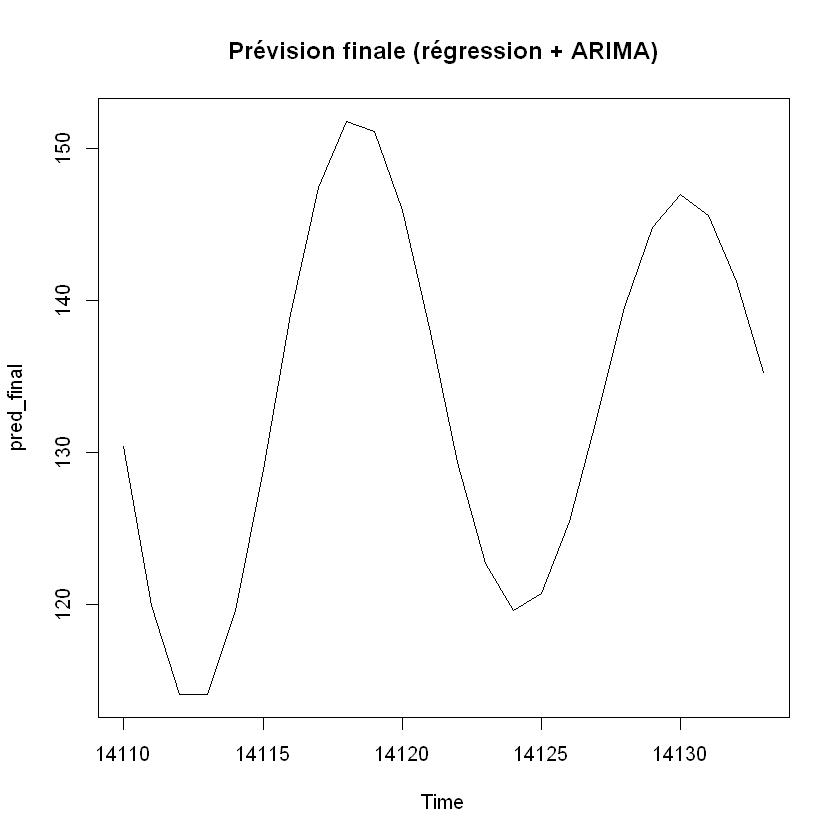

In [64]:
print(pred_final)
plot(pred_final, type="l", main="Prévision finale (régression + ARIMA)")

### Ce qu'on a fait

1. **Génération de nouvelles données temporelles**  
   Une table `new_data` a été construite pour représenter les 24 prochaines heures, incluant :
   - La variable temporelle `t`
   - Son carré `t²` (pour la tendance quadratique)
   - Les dummies saisonnières `DV1` à `DV23` (comme dans les données d'entraînement)

2. **Application du modèle de régression (`Model3`)**  
   Le modèle linéaire a été utilisé pour produire une première prédiction (`pred_reg`) basée sur la tendance et la saisonnalité.

3. **Modélisation des résidus via ARIMA**  
   - Les résidus de `Model3` ont été extraits.
   - Un modèle ARIMA a été ajusté automatiquement via `auto.arima()`.
   - Une prévision sur 24 pas a été générée (`pred_arima`).

4. **Fusion des prédictions**  
   Les deux composantes ont été additionnées pour construire la **prévision finale hybride** :  
   `pred_final = pred_reg + pred_arima`.

5. **Visualisation de la prévision finale**  
   Un graphique a été produit pour montrer l’évolution attendue du trafic horaire au cours des 24 prochaines heures.

---

### Pourquoi cette approche ?

- Les séries temporelles sont souvent influencées par plusieurs composantes :  
  **tendance**, **saisonnalité**, et **bruit aléatoire**.
- En séparant la **structure déterministe** (modèle de régression) de la **structure stochastique** (ARIMA), on obtient des prévisions :
  - Plus **robustes**
  - Plus **précises**
  - Plus **interprétables**
- Cette approche capte les **motifs réguliers** tout en corrigeant les **dépendances résiduelles** non modélisées.

---

### Interprétation des résultats

- La **courbe prédite** montre un **comportement cyclique régulier**, conforme aux rythmes horaires typiques du trafic urbain.
- Les **valeurs prévues** sont cohérentes et réalistes, sans anomalies extrêmes.
- La structure capturée reflète bien les **pics journaliers** (matin et soir), indiquant une bonne efficacité des dummies horaires dans la modélisation de la saisonnalité.

---

### Conclusion

Cette **prédiction hybride** permet une modélisation **fine**, **explicable**, et **réaliste** du trafic horaire.  
Elle constitue un outil pertinent pour les **systèmes de gestion urbaine intelligents**, en aidant à anticiper la **congestion** et à optimiser les **décisions en temps réel**.
